# Completely optional
... but fun! 
#### Geek-out about Pandas Expanding Rolling Windows follows (a.k.a. `"Let's measure the Earth!!"`)

Rolling windows are cool, especially because they forget the far past, and keep only the recent data "in mind" when performing operations. There are [many types of rolling window](https://docs.scipy.org/doc/scipy/reference/signal.html#window-functions) which are out of scope of the Academy.

I do however want to mention the expanding rolling window, as it is crazy cool! _(Confession bear: This is not technically timeseries, but just about the rolling windows of Pandas.)_

![Al Biruni](https://www.thefamouspeople.com/profiles/images/ab-rayn-al-brn-1.jpg)

Let's say you are [Al-Biruni, and you are trying to calculate the radius of the earth in the 9th century](https://www.quora.com/When-and-how-did-scientists-measure-the-radius-of-the-earth). (for argument's sake). 

You take measurements using his rudimentary yet brilliant approach, but your instrument is not that precise. 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import utils
import matplotlib

In [2]:
our_precision = .03

Let's go measure the earth!

In [3]:
first_try = utils.measure_the_earth(our_precision, verbose=True);

We measured 6277.56 Km which is wrong by -93.44 Km


Uff... ok, let's try again.

In [4]:
second_try = utils.measure_the_earth(our_precision, verbose=True);

We measured 6630.85 Km which is wrong by 259.85 Km


Ok, maybe third time is the charm... 

In [5]:
third_try = utils.measure_the_earth(our_precision, verbose=True);

We measured 6229.22 Km which is wrong by -141.78 Km


Oh boy... well we know we can average stuff out... maybe that will help? 

In [6]:
mean_measure = np.mean([first_try, second_try, third_try])
utils.measure_error(mean_measure, corect_measure=6371)

We measured 6379.21 Km which is wrong by 8.21 Km


So... how many do we need? You don't remember much about statistics, but you know that measuring the same thing many times should bring you closer to the result.

This is where expanding rolling windows come into play: we can follow how the mean evolves with more and more measurements.

In this case, your first measure is in no way inferior to your most recent measure, all of them are equally useful. Let's measure the Earth a thousand times.

In [7]:
measurements = pd.Series([utils.measure_the_earth(our_precision) for i in range(1000)])

Let's use an expanding window to see how our mean evolves with the number of experiments: 

In [8]:
series_of_measurements = measurements.expanding().mean()

And let's a plot it. The green dotted line is the true value (which of course you don't know when doing the measurements).

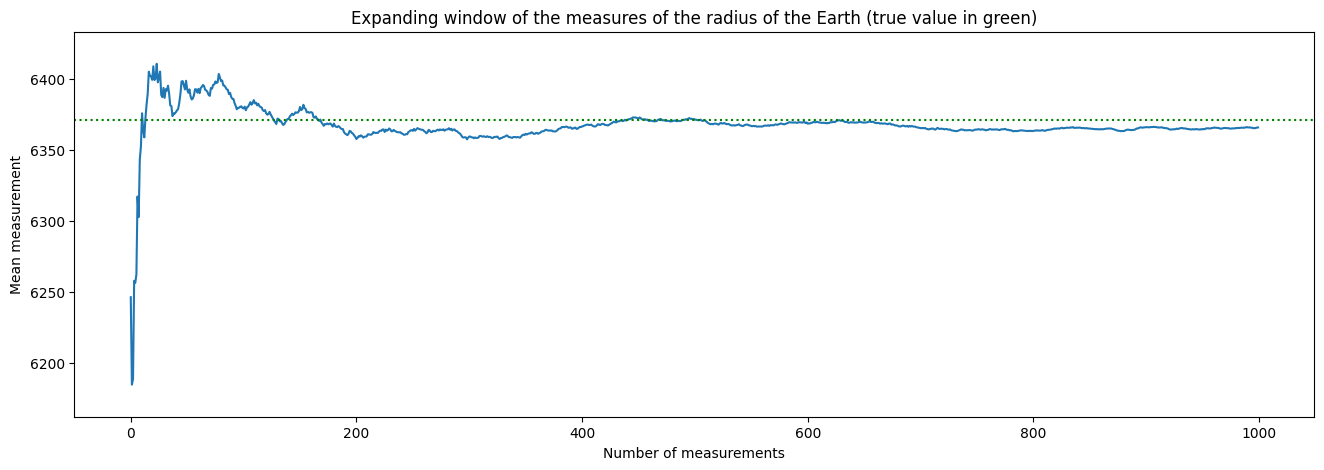

In [9]:
utils.plot_number_of_tries(series_of_measurements)

We can see that the mean value of the measurements is slowly stabilizing and approaching the true value.

So as a summary, expanding rolling windows are super-useful when we are measuring something we know to be a constant, and we have a sequence of measures. We can see how the value stabilizes which gives us a feeling for how many data points we need. So... cool! 